In [32]:
import pandas as pd
import numpy as np
from gensim.models.word2vec import Word2Vec
import os
import matplotlib.pyplot as plt
import seaborn as sns
import platform

In [33]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [2]:
data_path = '../../../data/뉴스'

train_token_path = os.path.join(data_path, 'token.csv')
test_token_path = os.path.join(data_path, 'test_token.csv')

train_token = pd.read_csv(train_token_path)
test_token = pd.read_csv(test_token_path)

In [3]:
train_token

,title,topic_idx
0,인천 → 핀란드 항공기 결항 휴가 철 여행객 분통,<bound method IndexOpsMixin.tolist of index\n0...
1,실리콘밸리 넘어서겠다 구글 15조원 들여 美 전역 거점 화,<bound method IndexOpsMixin.tolist of index\n0...
2,이란 외무 긴장 완화 해결 책 미국 경제 전쟁 멈추는 것,<bound method IndexOpsMixin.tolist of index\n0...
3,NYT 클린턴 측근 韓 기업 특수 관계 조명 공과 사 맞 물려 종합,<bound method IndexOpsMixin.tolist of index\n0...
4,시진핑 트럼프 중미 무역 협상 조속 타결 희망,<bound method IndexOpsMixin.tolist of index\n0...
...,...,...
45649,KB 금융 미국 IB 스티펠 제휴 선진국 시장 공략,<bound method IndexOpsMixin.tolist of index\n0...
45650,1 보 서울시 교육청 신종 코로나 확산 개학 연기 휴업 검토,<bound method IndexOpsMixin.tolist of index\n0...
45651,게시판 키움 증권 2020 키움 영웅 전 실전 투자 대회,<bound method IndexOpsMixin.tolist of index\n0...
45652,답변 하는 배 기동 국립 중앙 박물관 장,<bound method IndexOpsMixin.tolist of index\n0...


In [4]:
tokenize_data = []
for sentence in train_token['title'].tolist():
    tokenize_data.append(sentence.split(' '))

In [11]:
# word2vec
model = Word2Vec(sentences = tokenize_data, window = 5, min_count = 1, workers = 4, sg = 0)

In [12]:
model.wv.vectors.shape

(35987, 100)

In [15]:
word_vectors = model.wv
vocabs = word_vectors.key_to_index
vector_matrix = word_vectors.vectors

In [18]:
mean_embedding = []
for sentence in train_token['title'].tolist():
    temp = []
    tokens = sentence.split(' ')
    for token in tokens:
        ids = vocabs[token]
        vector = vector_matrix[ids]
        temp.append(vector)
    mean_sentence = np.mean(temp, axis=0)
    mean_embedding.append(mean_sentence)

In [23]:
mean_embedding = np.array(mean_embedding)
mean_embedding.shape

(45654, 100)

In [27]:
from sklearn.cluster import DBSCAN

In [29]:
dbscan = DBSCAN(metric='cosine')
dbscan.fit(mean_embedding)

DBSCAN(metric='cosine')

In [30]:
from sklearn.manifold import TSNE

In [34]:
tsne = TSNE(random_state=42)
reduction = tsne.fit_transform(mean_embedding)
reduction

C:\Users\82104\anaconda3\envs\DCC\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\82104\anaconda3\envs\DCC\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[-22.8888    ,  25.463198  ],
       [  0.36724368,  46.527225  ],
       [ 51.658     ,  24.974901  ],
       ...,
       [-39.54443   , -27.091085  ],
       [ 32.799923  ,   5.3757095 ],
       [ -0.55664307,   6.556627  ]], dtype=float32)

<AxesSubplot:xlabel='x', ylabel='y'>

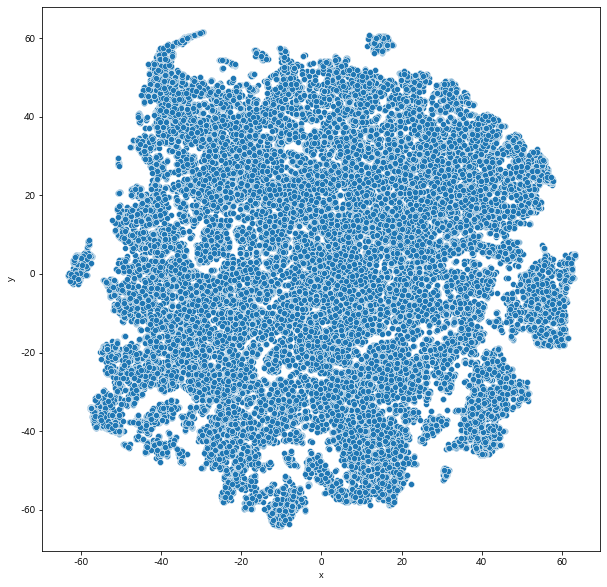

In [36]:
reduction_df = pd.DataFrame(reduction, columns=['x', 'y'])
plt.figure(figsize=(10, 10))
sns.scatterplot(data=reduction_df, x='x', y='y')

<AxesSubplot:xlabel='x', ylabel='y'>

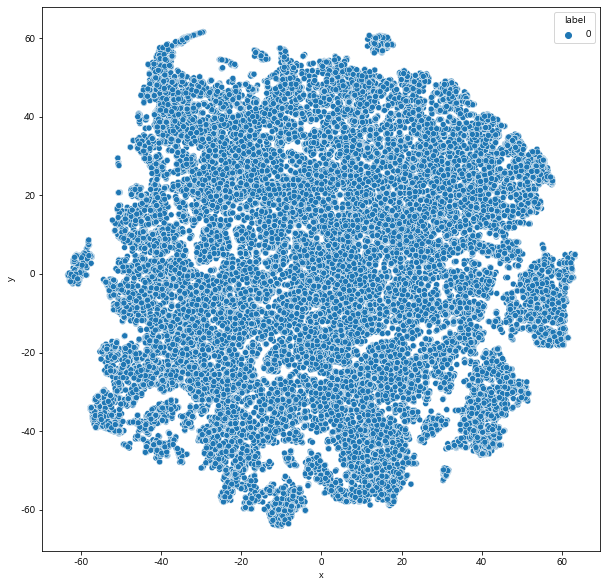

In [38]:
reduction_df['label'] = dbscan.labels_
plt.figure(figsize=(10, 10))
sns.scatterplot(data=reduction_df, x='x', y='y', hue='label')